In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
import matplotlib.pyplot as plt
import mnist
train_images = mnist.train_images()[:5000]
train_labels = mnist.train_labels()[:5000]
test_images = mnist.test_images()[:1000]
test_labels = mnist.test_labels()[:1000]
np.savez('mnist.npz', train_images = train_images, train_labels = train_labels, test_images = test_images, test_labels = test_labels)


In [2]:
f = np.load('mnist.npz')
train_images = f['train_images']
train_labels = f['train_labels']
test_images = f['test_images']
test_labels = f['test_labels']
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(5000, 28, 28) (5000,) (1000, 28, 28) (1000,)


5


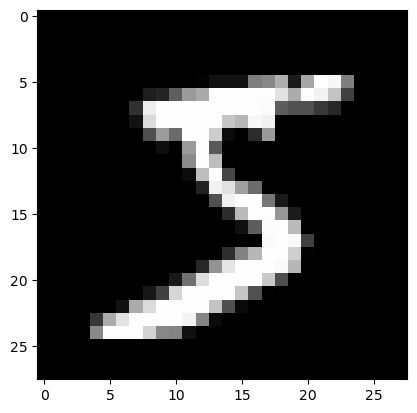

In [3]:
plt.imshow(train_images[0], cmap = "gray")
print(train_labels[0])

In [4]:
def get_accuracy(n, select):
  clf = SVC()
  if select == 'firstn':
    clf.fit(train_images[:n].reshape((-1,28*28)), train_labels[:n])
  elif select== 'lastn':
    clf.fit(train_images[-n:].reshape((-1,28*28)), train_labels[-n:])
  pred = clf.predict(test_images.reshape((-1,28*28)))
  return sum(pred==test_labels)/len(test_labels)

In [5]:
for i in [100,1000,2000,3000]:
    print(get_accuracy(i, 'firstn'), end = ", ")
print('')
for i in [100,1000,2000,3000]:
    print(get_accuracy(i, 'lastn'), end = ", ")

# expected results
# 0.616, 0.875, 0.905, 0.922, 
# 0.596, 0.886, 0.911, 0.924,  

0.616, 0.875, 0.905, 0.922, 
0.596, 0.886, 0.911, 0.924, 

## Gaussian Process Regression

In [6]:
f = lambda x: np.sin(3 * np.pi * x)
X_train = np.linspace(0,5,41)[:,None]
y_train = np.array([ 0.04729858,  0.85573694,  0.73135073, -0.552757  , -0.92468572,
       -0.53615557,  0.70761949,  0.91185677, -0.08069819, -0.63669759,
       -0.76688907,  0.42992913,  1.10959561,  0.26116655, -0.57287114,
       -0.93609451,  0.10125155,  0.83249262,  0.60415376, -0.26170379,
       -0.94981277, -0.36879881,  0.77118289,  0.9766128 , -0.11543602,
       -1.14521288, -0.87528243,  0.20387401,  0.77814651,  0.31794035,
       -0.75994721, -0.92780045,  0.02149759,  0.88544365,  0.68171637,
       -0.37535822, -1.09972038, -0.45406906,  0.71064842,  0.856085  ,
       -0.05718811])
X_test = np.linspace(0,10,1001)[:,None]
kernel =   kernels.WhiteKernel(1.0, noise_level_bounds=[0.001,2]) \
        + kernels.ConstantKernel(1.0, constant_value_bounds=[0.1,2]) \
        * kernels.ExpSineSquared(length_scale=1.0, periodicity=2.0,length_scale_bounds=[0.2,4], periodicity_bounds=[0.1,5])

WhiteKernel(noise_level=0.0126) + 1.17**2 * ExpSineSquared(length_scale=0.693, periodicity=2)


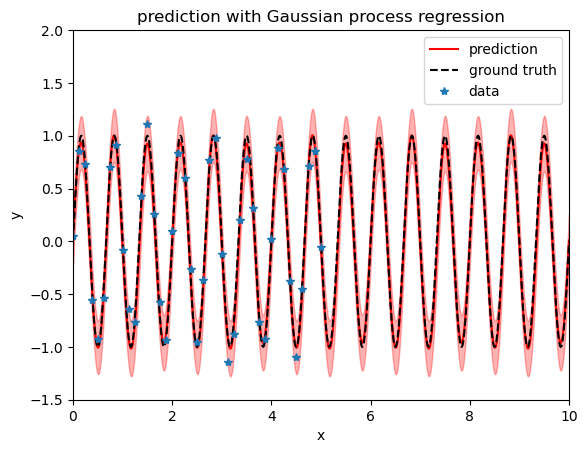

In [7]:
gpr = GaussianProcessRegressor(kernel)
gpr.fit(X_train, y_train)
mean, std = gpr.predict(X_test, return_std=True)
print(gpr.kernel_)

plt.plot(X_test[:,0], mean, 'r-', label = 'prediction')
plt.plot(X_test[:,0], f(X_test[:,0]), 'k--', label = 'ground truth')
plt.plot(X_train[:,0], y_train, '*', label = 'data')
plt.fill_between(X_test[:,0], mean+2*std, mean-2*std, color = 'red', alpha = 0.3)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.5,2)
plt.xlim(0,10)
plt.title('prediction with Gaussian process regression')
plt.show()